In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from main.utils import load_experiments, load_experiment, set_style


# Use the seaborn colorblind style
set_style()

In [2]:
# naming of methods
method_names = {
    'badge': 'BADGE',
    'random': 'Random',
    'entropy': 'Entropy',
    'bald': 'BALD',
    'max_logdet_S': 'Similarity LogDet',
    'similarity_kmeans': 'Similarity K-Means',
}

# naming of datasets
dataset_names = {
    'mnist': 'MNIST',
    'fashion_mnist': 'Fashion-MNIST',
    'dirty_mnist': 'Dirty-MNIST',
    'repeated_mnist': 'Repeated-MNIST',
    'imagenet': 'ImageNet',
}

methods = ['random', 'entropy', 'bald', 'badge', 'max_logdet_S', 'similarity_kmeans']
n_seeds = 3
batch_size = 10
dataset = 'dirty_mnist'

In [3]:
all_results = []
for batch_size in [10, 20, 100]:
    n_seeds = 3
    results = {}
    for method in methods:
        experiment_ids = [f'{method}_{dataset}_20_to_{total_data}_B={batch_size}_{i + 1}' for i in range(n_seeds)]
        res = load_experiments(experiment_ids, base_dir='timing') #'experiments_dirty_mnist_10' if dataset == 'dirty_mnist' else 'experiments')
        times = [np.median(result[1]['times']) for result in res]
        results[method] = np.mean(times)
    all_results.append(results)

In [10]:
resdf = pd.DataFrame(all_results)

# drop random
resdf = resdf.iloc[:, 1:]
resdf = pd.DataFrame(resdf.values/ resdf.values[:,0].reshape(-1, 1))

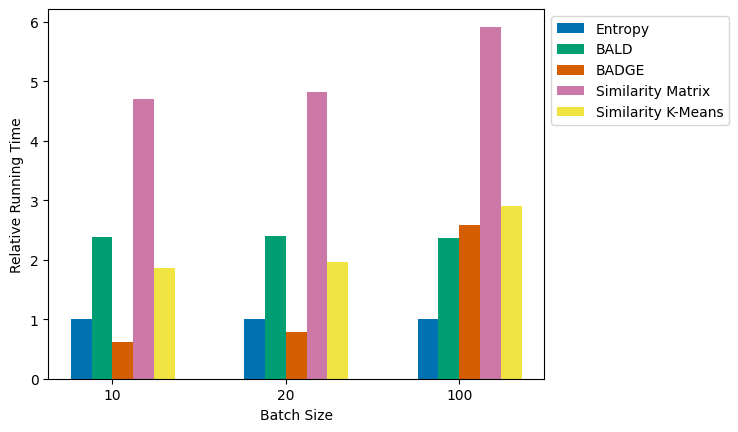

In [12]:
# Number of categories (names)
n = 3

# Position of bars on the x-axis
ind = np.arange(n)

# Width of the bars
width = 0.12

# Plotting
fig, ax = plt.subplots()

#bar1 = ax.bar(ind - 2.5*width, resdf.iloc[:,0], width, label='Random')
bar2 = ax.bar(ind - 1.5*width, resdf.iloc[:,0], width, label='Entropy')
bar3 = ax.bar(ind - 0.5*width, resdf.iloc[:,1], width, label='BALD')
bar4 = ax.bar(ind + 0.5*width, resdf.iloc[:,2], width, label='BADGE')
bar5 = ax.bar(ind + 1.5*width, resdf.iloc[:,3], width, label='Similarity Matrix')
bar7 = ax.bar(ind + 2.5*width, resdf.iloc[:,4], width, label='Similarity K-Means')

# Adding labels
ax.set_xlabel('Batch Size')
ax.set_ylabel('Relative Running Time')
ax.set_xticks(ind)
ax.set_xticklabels(['10', '20', '100'])
ax.legend()
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.savefig('running_times_good_quality.png', bbox_inches='tight', dpi=500)